# Praca domowa 6

## Zadanie 1


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/MI2-Education/2023L-ExploratoryDataAnalysis/main/homeworks/hw6/house_data.csv",
                delimiter = ",").dropna().reset_index(drop = True)

**1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakość wykończenia jest równa lub większa od mediany jakości wykończenia?**


In [58]:
# Opcja, kiedy liczymy medianę jakości wykończenia wszystkich domów
# Obliczamy medianę jakości wykończenia
med_grade = df.grade.median() 

# Liczymy średnią cenę nieruchomości spełniające warunki zadane w zadaniu
avg_price = df.price[(df.waterfront == 1) & (df.grade >= med_grade)].mean()

# Zaokrąglamy do dwóch miejsc po przecinku
avg_price_all = round(avg_price, 2)

Odp: 1 784 151.7 USD

In [59]:
# Opcja, kiedy liczymy medianę jakości wykończenia domów z widokiem na wodę
# Obliczamy medianę jakości wykończenia
med_grade = df.grade[df.waterfront == 1].median() 

# Liczymy średnią cenę nieruchomości spełniające warunki zadane w zadaniu
avg_price = df.price[(df.waterfront == 1) & (df.grade >= med_grade)].mean()

# Zaokrąglamy do dwóch miejsc po przecinku
avg_price_ww = round(avg_price, 2)

Odp: 2 302 236.31 USD

**2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?**


In [60]:
# Stworzymy funkcję, która oblicza medianę liczby łazienek w zależności od piętra
def med_bathrooms(floor):
  result = df.bathrooms[df.floors == floor].median()
  return result

# Rozwiązanie naszego zadania
if med_bathrooms(2) > med_bathrooms(3):
   print("Nieruchomości o 2 piętrach mają większą liczbę łazienek niż\
    nieruchomości o 3 piętrach")
else :
  print("Nieruchomości o 2 piętrach nie mają większej liczby łazienek niż\
  nieruchomości o 3 piętrach")


Nieruchomości o 2 piętrach nie mają większej liczby łazienek niż  nieruchomości o 3 piętrach


Odp: Nieruchomości o 2 piętrach **nie mają** większej liczby łazienek niż nieruchomości o 3 piętrach

**3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?**

In [61]:
# Liczymy najpierw najbardziej oddalone wierzchołki na południe i północ
north_pole = df.lat.max()
south_pole = df.lat.min()

# Nieruchomości położone na północy, będą zdefioniowane jako te, które mają 
# szerokość geograficzna >= north_pole + south_pole / 2

critical_point = (north_pole + south_pole) / 2

north_estate = df[ df.lat >= critical_point]

# Obliczamy kwartyle dla nieruchomości z widokiem na wodę

q25_water = np.percentile(north_estate.grade[df.waterfront == 1], 25)
q75_water = np.percentile(north_estate.grade[df.waterfront == 1], 75)

print("Dla nieruchomości z widokiem na wodę kwartyl 0.25 wynosi", q25_water,
      ", zaś kwartyl 0.75 -", q75_water)

# Obliczamy kwartyle dla nieruchomości bez widoku na wodę

q25_nowater = np.percentile(north_estate.grade[df.waterfront == 0], 25)
q75_nowater = np.percentile(north_estate.grade[df.waterfront == 0], 75)

print("Dla nieruchomości bez widoku na wodę kwartyl 0.25 wynosi", q25_nowater,
      ", zaś kwartyl 0.75 -", q75_nowater)

Dla nieruchomości z widokiem na wodę kwartyl 0.25 wynosi 8.0 , zaś kwartyl 0.75 - 10.0
Dla nieruchomości bez widoku na wodę kwartyl 0.25 wynosi 7.0 , zaś kwartyl 0.75 - 8.0


Odp: Dla nieruchomości z widokiem na wodę kwartyl 0.25 wynosi 8.0 , zaś kwartyl 0.75 - 10.0 <br />
Dla nieruchomości bez widoku na wodę kwartyl 0.25 wynosi 7.0 , zaś kwartyl 0.75 - 8.0

**4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?**

In [62]:
# Szukamy najpierw pod jakim kodem pocztowym jest położonych najwięcej nieruchomości
count_zipcode = df["zipcode"].value_counts()

# Chcemy indeks - kod pocztowy dla którego jest najwięcej nieruchomości
the_best_zipcode = count_zipcode.idxmax()

print(the_best_zipcode,
      "jest kodem pocztowym pod którym jest położonych najwięcej nieruchomości")

# Szukamy rozstępu międzykwartylowego dla cen nieruchomości
# Wyznaczamy kwartyle
q75, q25 = np.percentile(df[df.zipcode == the_best_zipcode]["price"], [75,25])

# Wyznaczamy rozstęp
iqr = q75 - q25

print("Rozstęp międzykwartylowy dla ceny nieruchomości położonych pod adresem",
      the_best_zipcode, "wynosi" ,iqr)

98103 jest kodem pocztowym pod którym jest położonych najwięcej nieruchomości
Rozstęp międzykwartylowy dla ceny nieruchomości położonych pod adresem 98103 wynosi 262875.0


Odp: 98103 jest kodem pocztowym pod którym jest położonych najwięcej nieruchomości. <br />
Rozstęp międzykwartylowy dla ceny nieruchomości położonych pod  adresem 98103 wynosi 262875.0

**5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?**

In [63]:
# Wyznaczmy ile nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni
bigger_sqft = df[df.sqft_lot < df.sqft_lot15].id.count()

all = df.id.count()

# Wyliczamy procent

result = round(bigger_sqft / all * 100, 2)
print(result, "% nieruchomości ma wyższą średnią powierzchnię 15 najbliższych \
sąsiadów względem swojej powierzchni")

39.51 % nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni


Odp: 39.51 % nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni.

 **6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?**

In [64]:
# Wykorzystamy już nasz punkt krytyczny z zadania 3
critical_point_ns = critical_point

# Analogicznie zrobimy dla wschodu i zachodu
east_pole = df.long.max()
west_pole = df.long.min()

critical_point_ew = (east_pole + west_pole) / 2

# Nieruchomości położone na północnym zachodzie, będą zdefioniowane jako te, 
# które mają  szerokość geograficzna >= critical_point_ns oraz długość 
# geograficzną <= critical_poin_ew i analogicznie nieruchomości na południowym wschodzie

nw_estate = df[(df.lat >= critical_point_ns) & (df.long <= critical_point_ew)] \
              .id.count()

se_estate = df[(df.lat <= critical_point_ns) & (df.long >= critical_point_ew)] \
              .id.count()
result = (nw_estate - se_estate) / nw_estate * 100
result = round(result, 2)

Odp: O 99.46% więcej jest nieruchomości leżących na północny zachód niż nieruchomości leżących na południowy wschód.

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a) Badamy liczbę domów z szczególnym widokiem. W kolumnie view mamy ocenę od 0 do 4 widoku, zatem jest to zmienna jakościowa opisująca cechę nieruchomości. Na wykresie przedstawimy liczbę nieruchomości z widokiem ocenionym na poziom nie niższy niż 1. Dodatkowo wprowadzimy skalę:

1.   view = 1 - zły
2.   view = 2 - przeciętny
3.   view = 3 - dobry
4.   view = 4 - bardzo dobry.



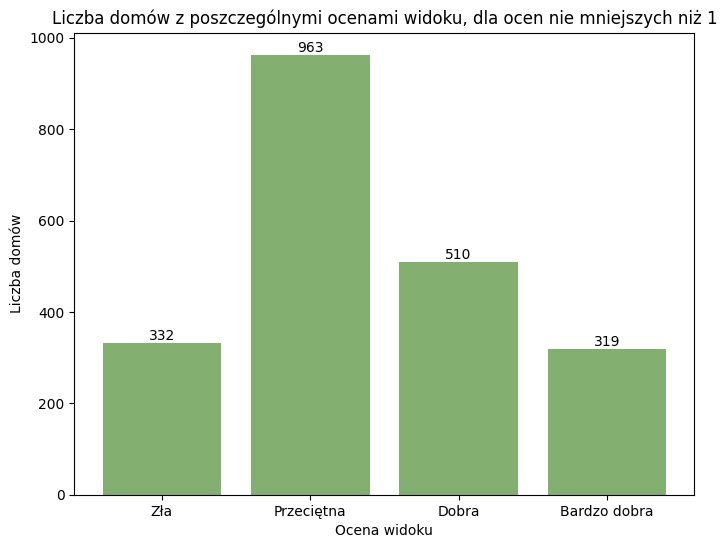

In [70]:
# Wybieramy nieruchomości z widokiem >= 1
df_view = df[df.view >=1].view.value_counts().sort_index()

labels = ['Zła', 'Przeciętna', 'Dobra', 'Bardzo dobra']

# Wykres słupkowy
plt.figure(figsize=(8, 6))
plt.bar(df_view.index, df_view.values, color = "#83af70")
plt.xlabel('Ocena widoku')
plt.ylabel('Liczba domów')
plt.title('Liczba domów z poszczególnymi ocenami widoku, dla ocen nie mniejszych niż 1')
plt.xticks(df_view.index, labels)

# Dodajemy podpis nad każdym słupkiem
for i, value in enumerate(df_view.values):
    plt.text(df_view.index[i], value, str(value), ha='center', va='bottom')

plt.show()

b) Badamy średnią wielkość mieszkania w zależności od roku jej wybudowania. Wielkość mieszkania jest podana w stopach kwadratowych i jest to oczywiście zmienna ilościowa. Dodatkowo wprowadzimy przyporządkowanie lat, do konkretnego przedziału, aby wykres był czytelniejszy.

In [66]:
# Funkcja, która przyporządkowuje dany rok, do przedziału
def map_year_interval(year):
    start_year = (year // 10) * 10
    end_year = start_year + 9
    return f'{start_year}-{end_year}'

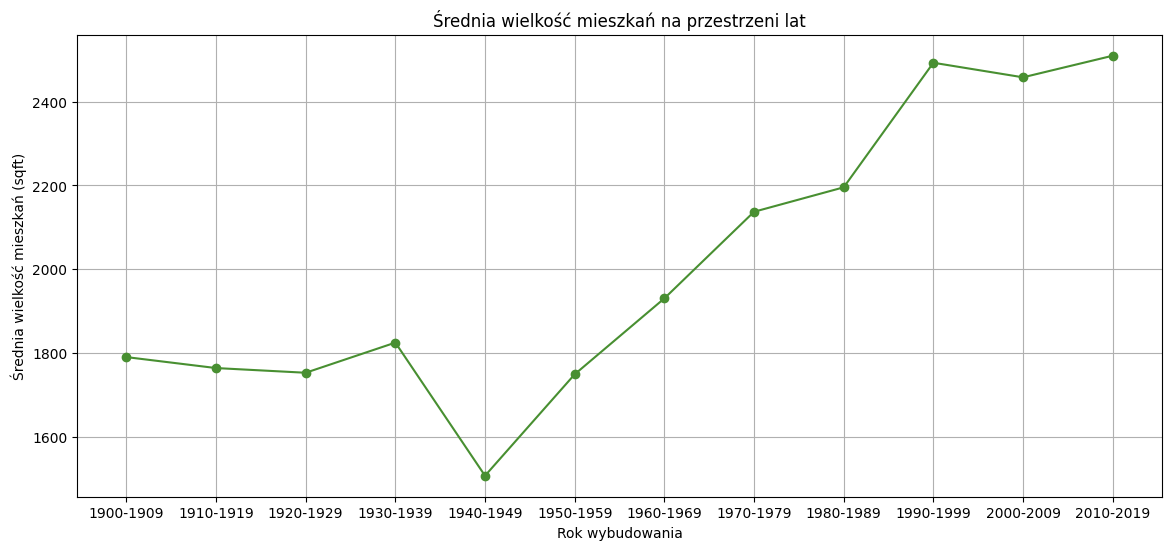

In [67]:
# Dodajemy nową kolumną odpowiedzialną za przedziału lat- co 10 lat
df['year_interval'] = df['yr_built'].map(map_year_interval)

# Grupowanie danych i obliczanie średniej
df_grouped = df.groupby('year_interval')['sqft_living'].mean().reset_index()

# Wykres
plt.figure(figsize=(14, 6))
plt.plot(df_grouped['year_interval'], df_grouped['sqft_living'], marker='o', color = "#488f31")
plt.xlabel('Rok wybudowania')
plt.ylabel('Średnia wielkość mieszkań (sqft)')
plt.title('Średnia wielkość mieszkań na przestrzeni lat')
plt.grid(True)
plt.show()

c) Na wykresie zbadamy zależność liczby łazienek(co jest zmienną ilościową) a jakością konstrukcji i wykończenia( jest to zmienna jakościowa). Wykorzystałam wykres skrzypcowy. Dodatkowo zastosowałam skale oceny jakości konstrukcji.

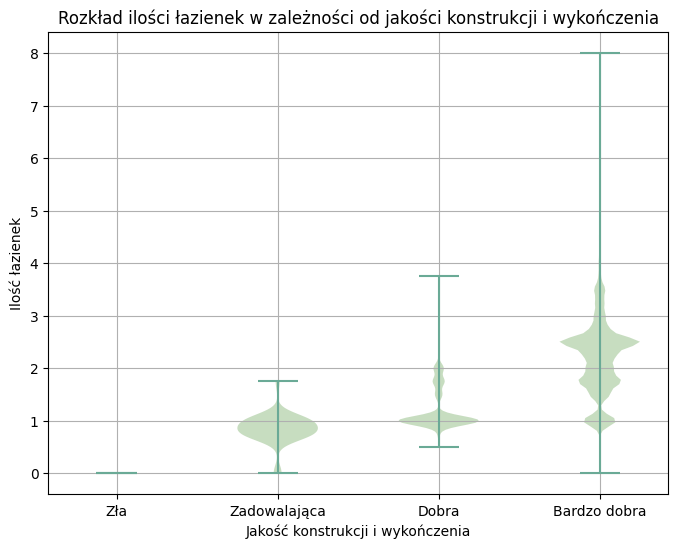

In [68]:
def map_quality(grade):
    if grade < 3:
        return 'Zła'
    elif grade >= 3 and grade < 5:
        return 'Zadowalająca'
    elif grade >= 5 and grade < 7:
        return 'Dobra'
    elif grade >= 7:
        return 'Bardzo dobra'

df_1 = df
df_1['quality'] = df_1['grade'].apply(map_quality)

# Tworzenie listy danych dla poszczególnych jakości
quality_data = [
    df_1[df_1['quality'] == 'Zła']['bathrooms'],
    df_1[df_1['quality'] == 'Zadowalająca']['bathrooms'],
    df_1[df_1['quality'] == 'Dobra']['bathrooms'],
    df_1[df_1['quality'] == 'Bardzo dobra']['bathrooms']
]

# Wykres pudełkowy
plt.figure(figsize=(8, 6))
violin = plt.violinplot(quality_data)
plt.xlabel('Jakość konstrukcji i wykończenia')
plt.ylabel('Ilość łazienek')
plt.title('Rozkład ilości łazienek w zależności od jakości konstrukcji i wykończenia')
plt.xticks([1, 2, 3, 4], ['Zła', 'Zadowalająca', 'Dobra', 'Bardzo dobra'])
plt.grid(True)

# Estetyka wykresu
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor("#6aaa96")

for pc in violin['bodies']:
    pc.set_facecolor('#488f31') 

plt.show()

DODATEK
Na poniższym wykresie zbadamy, czy lokalizacja nad wodą na pewno w ramce danych oznaczona jest jako wartość 1 (-;

In [ ]:
import folium

df = df[df.waterfront == 1]

# Utworzenie obiektu mapa
m = folium.Map(location=[critical_point_ns, critical_point_ew], zoom_start=12)

# Zaznaczanie lokalizacji na mapie
for index, row in df.iterrows():
    folium.Marker(location=[row['lat'], row['long']]).add_to(m)

# Wyświetlanie mapy
m
